In [1]:
#Run for necessary dependencies
# !pip install scikit-learn
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 26

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             286 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
52/91 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.0467 - loss: 3.3244 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0529 - loss: 3.2961 - val_accuracy: 0.1242 - val_loss: 3.1367
Epoch 2/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.0907 - loss: 3.1569
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0949 - loss: 3.1410 - val_accuracy: 0.1504 - val_loss: 2.9401
Epoch 3/1000
56/91 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.1226 - loss: 2.9979
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1251 - loss: 2.9845 - val_accuracy: 0.2138 - val_loss: 2.7571
Epoch 4/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.1398 - loss: 2.8825
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1419 - loss: 2.8690 - val_accuracy: 0.2358 - val_loss: 2.5827
Epoch 5/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.1656 - loss: 2.7527
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1691 - loss: 2.7366 - val_accuracy: 0.2852 - val_loss: 2.3971
Epoch 6/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.1826 - loss: 2.6207
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1866 - loss: 2.6049 - val_accuracy: 0.3127 - val_loss: 2.2119
Epoch 7/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.2172 - loss: 2.4810
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2177 - loss: 2.4786 - val_accuracy: 0.3823 - val_loss: 2.0736
Epoch 8/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.2270 - loss: 2.4246
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2303 - loss: 2.4126 - val_accuracy: 0.4335 - val_loss: 1.9471
Epoch 9/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.2345 - loss: 2.3310
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2366 - loss: 2.3271 - val_accuracy: 0.4712 - val_loss: 1.8493
Epoch 10/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.2519 - loss: 2.2954
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2523 - loss: 2.2878 - val_accuracy: 0.4756 - val_loss: 1.7824
Epoch 11/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.2659 - loss: 2.2387
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2640 - loss: 2.2370 - val_accuracy: 0.5036 - val_loss: 1.7278
Epoch 12/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.2700 - loss: 2.1858
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2691 - loss: 2.1856 - val_accuracy: 0.5013 - val_loss: 1.6812
Epoch 13/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.2694 - loss: 2.1888
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2699 - loss: 2.1862 - val_accuracy: 0.5205 - val_loss: 1.6545
Epoch 14/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.2672 - loss: 2.1679
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2706 - loss: 2.1595 - val_accuracy: 0.5348 - val_loss: 1.6169
Epoch 15/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.2767 - loss: 2.1173
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2796 - loss: 2.1211 - val_accuracy: 0.5647 - val_loss: 1.5982
Epoch 16/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.2824 - loss: 2.1135
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2854 - loss: 2.1100 - val_accuracy: 0.5494 - val_loss: 1.5800
Epoch 17/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.2988 - loss: 2.0963
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2984 - loss: 2.0913 - val_accuracy: 0.5618 - val_loss: 1.5534
Epoch 18/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.2930 - loss: 2.0509
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2923 - loss: 2.0623 - val_accuracy: 0.5745 - val_loss: 1.5507
Epoch 19/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.3042 - loss: 2.0343
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3051 - loss: 2.0320 - val_accuracy: 0.5930 - val_loss: 1.5056
Epoch 20/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.3175 - loss: 2.0093
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3160 - loss: 2.0174 - val_accuracy: 0.5958 - val_loss: 1.5002
Epoch 21/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.3158 - loss: 1.9918
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3154 - loss: 1.9966 - val_accuracy: 0.5813 - val_loss: 1.4690
Epoch 22/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.3246 - loss: 2.0028
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3245 - loss: 1.9991 - val_accuracy: 0.5990 - val_loss: 1.4513
Epoch 23/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.3228 - loss: 1.9932
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3227 - loss: 1.9948 - val_accuracy: 0.5935 - val_loss: 1.4600
Epoch 24/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.3236 - loss: 1.9737
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3249 - loss: 1.9720 - val_accuracy: 0.5958 - val_loss: 1.4284
Epoch 25/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.3423 - loss: 1.9543
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3399 - loss: 1.9543 - val_accuracy: 0.6135 - val_loss: 1.4178
Epoch 26/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.3469 - loss: 1.9237
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3435 - loss: 1.9264 - val_accuracy: 0.6143 - val_loss: 1.4226
Epoch 27/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.3505 - loss: 1.9217
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3489 - loss: 1.9246 - val_accuracy: 0.6169 - val_loss: 1.4014
Epoch 28/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.3551 - loss: 1.9286
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3535 - loss: 1.9261 - val_accuracy: 0.6301 - val_loss: 1.3676
Epoch 29/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.3338 - loss: 1.9548
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3390 - loss: 1.9404 - val_accuracy: 0.6322 - val_loss: 1.3650
Epoch 30/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.3599 - loss: 1.9053
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3591 - loss: 1.9005 - val_accuracy: 0.6244 - val_loss: 1.3628
Epoch 31/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.3561 - loss: 1.8764
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3566 - loss: 1.8792 - val_accuracy: 0.6218 - val_loss: 1.3575
Epoch 32/1000
56/91 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.3604 - loss: 1.8564
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3604 - loss: 1.8601 - val_accuracy: 0.6288 - val_loss: 1.3435
Epoch 33/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.3571 - loss: 1.8609
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3598 - loss: 1.8572 - val_accuracy: 0.6491 - val_loss: 1.3266
Epoch 34/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.3747 - loss: 1.8426
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3742 - loss: 1.8416 - val_accuracy: 0.6429 - val_loss: 1.3200
Epoch 35/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.3635 - loss: 1.8498
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3661 - loss: 1.8470 - val_accuracy: 0.6439 - val_loss: 1.3212
Epoch 36/1000
52/91 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.3780 - loss: 1.8220
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3795 - loss: 1.8184 - val_accuracy: 0.6748 - val_loss: 1.2962
Epoch 37/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.3786 - loss: 1.7988
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3791 - loss: 1.7993 - val_accuracy: 0.6403 - val_loss: 1.2992
Epoch 38/1000
49/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3769 - loss: 1.8211 
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3788 - loss: 1.8142 - val_accuracy: 0.6678 - val_loss: 1.2852
Epoch 39/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.4012 - loss: 1.7661
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3986 - loss: 1.7715 - val_accuracy: 0.6753 - val_loss: 1.2930
Epoch 40/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.4051 - loss: 1.7829
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4033 - loss: 1.7815 - val_accuracy: 0.6917 - val_loss: 1.2819
Epoch 41/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.3830 - loss: 1.7735
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3864 - loss: 1.7705 - val_accuracy: 0.6571 - val_loss: 1.2711
Epoch 42/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4009 - loss: 1.7318
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4000 - loss: 1.7388 - val_accuracy: 0.6709 - val_loss: 1.2548
Epoch 43/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.4001 - loss: 1.7353
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3993 - loss: 1.7414 - val_accuracy: 0.7000 - val_loss: 1.2478
Epoch 44/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.3963 - loss: 1.7572
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3982 - loss: 1.7581 - val_accuracy: 0.7010 - val_loss: 1.2428
Epoch 45/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4001 - loss: 1.7346
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4015 - loss: 1.7413 - val_accuracy: 0.6971 - val_loss: 1.2429
Epoch 46/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.4024 - loss: 1.7451
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4041 - loss: 1.7438 - val_accuracy: 0.6694 - val_loss: 1.2597
Epoch 47/1000
47/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4046 - loss: 1.7185 
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4070 - loss: 1.7184 - val_accuracy: 0.6818 - val_loss: 1.2499
Epoch 48/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.3983 - loss: 1.7475
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3998 - loss: 1.7395 - val_accuracy: 0.6935 - val_loss: 1.2368
Epoch 49/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.4178 - loss: 1.7016
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4181 - loss: 1.7004 - val_accuracy: 0.6735 - val_loss: 1.2283
Epoch 50/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4194 - loss: 1.7086
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4184 - loss: 1.7104 - val_accuracy: 0.6883 - val_loss: 1.2325
Epoch 51/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.3972 - loss: 1.7407
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4034 - loss: 1.7243 - val_accuracy: 0.6727 - val_loss: 1.2260
Epoch 52/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4139 - loss: 1.7111
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4150 - loss: 1.7080 - val_accuracy: 0.6857 - val_loss: 1.2203
Epoch 53/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.4166 - loss: 1.6913
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4174 - loss: 1.6894 - val_accuracy: 0.7234 - val_loss: 1.2044
Epoch 54/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.4108 - loss: 1.6930
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4123 - loss: 1.6909 - val_accuracy: 0.7042 - val_loss: 1.2111
Epoch 55/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.4239 - loss: 1.6829
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4249 - loss: 1.6815 - val_accuracy: 0.7088 - val_loss: 1.2074
Epoch 56/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4257 - loss: 1.6775
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4263 - loss: 1.6780 - val_accuracy: 0.6844 - val_loss: 1.1901
Epoch 57/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4284 - loss: 1.6739
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4286 - loss: 1.6735 - val_accuracy: 0.6810 - val_loss: 1.2106
Epoch 58/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.4237 - loss: 1.6324
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4242 - loss: 1.6411 - val_accuracy: 0.6945 - val_loss: 1.2192
Epoch 59/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.4273 - loss: 1.6581
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4269 - loss: 1.6598 - val_accuracy: 0.7239 - val_loss: 1.1805
Epoch 60/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.4353 - loss: 1.6510
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4362 - loss: 1.6503 - val_accuracy: 0.7104 - val_loss: 1.1766
Epoch 61/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.4301 - loss: 1.6564
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4289 - loss: 1.6625 - val_accuracy: 0.6914 - val_loss: 1.2092
Epoch 62/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4426 - loss: 1.6378
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4389 - loss: 1.6436 - val_accuracy: 0.7130 - val_loss: 1.1912
Epoch 63/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4339 - loss: 1.6553
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4342 - loss: 1.6545 - val_accuracy: 0.7023 - val_loss: 1.2037
Epoch 64/1000
53/91 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.4310 - loss: 1.6388
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4324 - loss: 1.6369 - val_accuracy: 0.7143 - val_loss: 1.1947
Epoch 65/1000
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4312 - loss: 1.6289
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4313 - loss: 1.6289 - val_accuracy: 0.7109 - val_loss: 1.1739
Epoch 66/1000
51/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4378 - loss: 1.6227 
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4371 - loss: 1.6247 - val_accuracy: 0.7135 - val_loss: 1.1794
Epoch 67/1000
48/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4375 - loss: 1.6124 
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4368 - loss: 1.6193 - val_accuracy: 0.7094 - val_loss: 1.1850
Epoch 68/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.4505 - loss: 1.5921
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4480 - loss: 1.5979 - val_accuracy: 0.6979 - val_loss: 1.1809
Epoch 69/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4528 - loss: 1.5940
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4487 - loss: 1.5983 - val_accuracy: 0.6758 - val_loss: 1.1933
Epoch 70/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.4429 - loss: 1.6090
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4415 - loss: 1.6122 - val_accuracy: 0.6943 - val_loss: 1.1982
Epoch 71/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4514 - loss: 1.6141
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4518 - loss: 1.6100 - val_accuracy: 0.6977 - val_loss: 1.1594
Epoch 72/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.4497 - loss: 1.5957
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4488 - loss: 1.6007 - val_accuracy: 0.7083 - val_loss: 1.1662
Epoch 73/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.4387 - loss: 1.6130
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4420 - loss: 1.6128 - val_accuracy: 0.6860 - val_loss: 1.1731
Epoch 74/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4576 - loss: 1.5892
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4568 - loss: 1.5915 - val_accuracy: 0.7000 - val_loss: 1.1583
Epoch 75/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.4468 - loss: 1.6394
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4456 - loss: 1.6364 - val_accuracy: 0.7234 - val_loss: 1.1528
Epoch 76/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4383 - loss: 1.6345
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4399 - loss: 1.6279 - val_accuracy: 0.6862 - val_loss: 1.1696
Epoch 77/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.4528 - loss: 1.6070
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4532 - loss: 1.5998 - val_accuracy: 0.6974 - val_loss: 1.1649
Epoch 78/1000
56/91 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.4566 - loss: 1.5823
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4547 - loss: 1.5884 - val_accuracy: 0.6919 - val_loss: 1.1815
Epoch 79/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.4574 - loss: 1.5665
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4568 - loss: 1.5681 - val_accuracy: 0.6712 - val_loss: 1.1634
Epoch 80/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.4438 - loss: 1.6058
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4455 - loss: 1.6036 - val_accuracy: 0.6979 - val_loss: 1.1754
Epoch 81/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4666 - loss: 1.5574
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4643 - loss: 1.5623 - val_accuracy: 0.6810 - val_loss: 1.1599
Epoch 82/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4537 - loss: 1.5842
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4587 - loss: 1.5766 - val_accuracy: 0.6914 - val_loss: 1.1497
Epoch 83/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.4551 - loss: 1.5614
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4576 - loss: 1.5615 - val_accuracy: 0.6745 - val_loss: 1.1527
Epoch 84/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.4613 - loss: 1.5863
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4626 - loss: 1.5820 - val_accuracy: 0.6990 - val_loss: 1.1312
Epoch 85/1000
62/91 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.4604 - loss: 1.5531
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4598 - loss: 1.5601 - val_accuracy: 0.6868 - val_loss: 1.1466
Epoch 86/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4518 - loss: 1.5711
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4529 - loss: 1.5742 - val_accuracy: 0.6891 - val_loss: 1.1486
Epoch 87/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4641 - loss: 1.5906
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4612 - loss: 1.5894 - val_accuracy: 0.7060 - val_loss: 1.1323
Epoch 88/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.4742 - loss: 1.5539
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4711 - loss: 1.5592 - val_accuracy: 0.6860 - val_loss: 1.1417
Epoch 89/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.4633 - loss: 1.5591
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4638 - loss: 1.5627 - val_accuracy: 0.7073 - val_loss: 1.1257
Epoch 90/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4682 - loss: 1.5480
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4679 - loss: 1.5481 - val_accuracy: 0.6725 - val_loss: 1.1309
Epoch 91/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.4654 - loss: 1.5491
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 1.5472 - val_accuracy: 0.7083 - val_loss: 1.1148
Epoch 92/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.4765 - loss: 1.5327
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4753 - loss: 1.5379 - val_accuracy: 0.7101 - val_loss: 1.1081
Epoch 93/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4711 - loss: 1.5351
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4708 - loss: 1.5361 - val_accuracy: 0.7031 - val_loss: 1.1193
Epoch 94/1000
57/91 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.4711 - loss: 1.5425
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4701 - loss: 1.5452 - val_accuracy: 0.6917 - val_loss: 1.1321
Epoch 95/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.4665 - loss: 1.5445
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4676 - loss: 1.5468 - val_accuracy: 0.6813 - val_loss: 1.1467
Epoch 96/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.4748 - loss: 1.5443
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4738 - loss: 1.5456 - val_accuracy: 0.6769 - val_loss: 1.1409
Epoch 97/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.4780 - loss: 1.5303
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4756 - loss: 1.5357 - val_accuracy: 0.7200 - val_loss: 1.1034
Epoch 98/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.4801 - loss: 1.5558
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4763 - loss: 1.5553 - val_accuracy: 0.7117 - val_loss: 1.1044
Epoch 99/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.4835 - loss: 1.5495
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4811 - loss: 1.5462 - val_accuracy: 0.6979 - val_loss: 1.1175
Epoch 100/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.4629 - loss: 1.5415
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4632 - loss: 1.5449 - val_accuracy: 0.7073 - val_loss: 1.1223
Epoch 101/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.4799 - loss: 1.5274
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4783 - loss: 1.5300 - val_accuracy: 0.7127 - val_loss: 1.1067
Epoch 102/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.4686 - loss: 1.5530
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4706 - loss: 1.5476 - val_accuracy: 0.7268 - val_loss: 1.0965
Epoch 103/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.4854 - loss: 1.5382
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4811 - loss: 1.5413 - val_accuracy: 0.6888 - val_loss: 1.1348
Epoch 104/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4846 - loss: 1.5287
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4820 - loss: 1.5345 - val_accuracy: 0.7096 - val_loss: 1.1060
Epoch 105/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4713 - loss: 1.5313
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4737 - loss: 1.5317 - val_accuracy: 0.6829 - val_loss: 1.1255
Epoch 106/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.4757 - loss: 1.5334
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4773 - loss: 1.5298 - val_accuracy: 0.7286 - val_loss: 1.0802
Epoch 107/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.4725 - loss: 1.5685
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4717 - loss: 1.5639 - val_accuracy: 0.6766 - val_loss: 1.1176
Epoch 108/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.4778 - loss: 1.5091
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4790 - loss: 1.5090 - val_accuracy: 0.6831 - val_loss: 1.0985
Epoch 109/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.4942 - loss: 1.5153
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4920 - loss: 1.5183 - val_accuracy: 0.6971 - val_loss: 1.0890
Epoch 110/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.4776 - loss: 1.5245
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4794 - loss: 1.5276 - val_accuracy: 0.7086 - val_loss: 1.0924
Epoch 111/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.4922 - loss: 1.5106
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4887 - loss: 1.5137 - val_accuracy: 0.7208 - val_loss: 1.0915
Epoch 112/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.4787 - loss: 1.5179
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4769 - loss: 1.5243 - val_accuracy: 0.6979 - val_loss: 1.1005
Epoch 113/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.4858 - loss: 1.5141
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4841 - loss: 1.5193 - val_accuracy: 0.7042 - val_loss: 1.1148
Epoch 114/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4828 - loss: 1.5161
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4810 - loss: 1.5203 - val_accuracy: 0.7270 - val_loss: 1.0838
Epoch 115/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.4788 - loss: 1.5174
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4816 - loss: 1.5143 - val_accuracy: 0.7068 - val_loss: 1.1129
Epoch 116/1000
62/91 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.4804 - loss: 1.5113
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4806 - loss: 1.5137 - val_accuracy: 0.6922 - val_loss: 1.1042
Epoch 117/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.4890 - loss: 1.5095
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4886 - loss: 1.5083 - val_accuracy: 0.6862 - val_loss: 1.0999
Epoch 118/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.4788 - loss: 1.5309
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4793 - loss: 1.5285 - val_accuracy: 0.7286 - val_loss: 1.0871
Epoch 119/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4949 - loss: 1.5183
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4931 - loss: 1.5168 - val_accuracy: 0.7039 - val_loss: 1.1194
Epoch 120/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4922 - loss: 1.4895
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4905 - loss: 1.4991 - val_accuracy: 0.6935 - val_loss: 1.0972
Epoch 121/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.5128 - loss: 1.4744
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 1.4826 - val_accuracy: 0.7075 - val_loss: 1.0733
Epoch 122/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4773 - loss: 1.5058
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4780 - loss: 1.5037 - val_accuracy: 0.7286 - val_loss: 1.0645
Epoch 123/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.4832 - loss: 1.5116
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4822 - loss: 1.5150 - val_accuracy: 0.6990 - val_loss: 1.0923
Epoch 124/1000
62/91 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.4951 - loss: 1.5039
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4928 - loss: 1.5026 - val_accuracy: 0.7036 - val_loss: 1.0791
Epoch 125/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.4889 - loss: 1.4837
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4881 - loss: 1.4876 - val_accuracy: 0.7000 - val_loss: 1.0848
Epoch 126/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4961 - loss: 1.4899
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4960 - loss: 1.4921 - val_accuracy: 0.7361 - val_loss: 1.0579
Epoch 127/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.4738 - loss: 1.5520
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4793 - loss: 1.5394 - val_accuracy: 0.7117 - val_loss: 1.0792
Epoch 128/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.4953 - loss: 1.4800
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4962 - loss: 1.4803 - val_accuracy: 0.7031 - val_loss: 1.0786
Epoch 129/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.4851 - loss: 1.5143
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4863 - loss: 1.5092 - val_accuracy: 0.7161 - val_loss: 1.0938
Epoch 130/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.4946 - loss: 1.4793
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4945 - loss: 1.4830 - val_accuracy: 0.6927 - val_loss: 1.0877
Epoch 131/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.4936 - loss: 1.4973
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4931 - loss: 1.4964 - val_accuracy: 0.7140 - val_loss: 1.0850
Epoch 132/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4931 - loss: 1.4890
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4926 - loss: 1.4920 - val_accuracy: 0.7496 - val_loss: 1.0594
Epoch 133/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.4924 - loss: 1.4845
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4929 - loss: 1.4822 - val_accuracy: 0.7010 - val_loss: 1.0896
Epoch 134/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.5021 - loss: 1.4316
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5014 - loss: 1.4469 - val_accuracy: 0.6932 - val_loss: 1.0909
Epoch 135/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.4901 - loss: 1.4992
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4917 - loss: 1.4939 - val_accuracy: 0.7005 - val_loss: 1.0879
Epoch 136/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.4973 - loss: 1.4893
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4932 - loss: 1.4986 - val_accuracy: 0.6743 - val_loss: 1.0912
Epoch 137/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.4844 - loss: 1.4924
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4879 - loss: 1.4895 - val_accuracy: 0.6906 - val_loss: 1.0892
Epoch 138/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.5026 - loss: 1.4476
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5049 - loss: 1.4519 - val_accuracy: 0.7036 - val_loss: 1.0748
Epoch 139/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.5022 - loss: 1.4548
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4993 - loss: 1.4644 - val_accuracy: 0.7104 - val_loss: 1.0990
Epoch 140/1000
56/91 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.5014 - loss: 1.4740
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5019 - loss: 1.4733 - val_accuracy: 0.6862 - val_loss: 1.0901
Epoch 141/1000
59/91 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.4930 - loss: 1.4684
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4964 - loss: 1.4678 - val_accuracy: 0.6971 - val_loss: 1.0730
Epoch 142/1000
61/91 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.5041 - loss: 1.4546
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5022 - loss: 1.4597 - val_accuracy: 0.6943 - val_loss: 1.0812
Epoch 143/1000
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.5113 - loss: 1.4607
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5103 - loss: 1.4622 - val_accuracy: 0.6842 - val_loss: 1.1038
Epoch 144/1000
74/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5031 - loss: 1.4883
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 1.4887 - val_accuracy: 0.6956 - val_loss: 1.0798
Epoch 145/1000
46/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5019 - loss: 1.4635 
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5041 - loss: 1.4673 - val_accuracy: 0.7140 - val_loss: 1.0941
Epoch 146/1000
58/91 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.4999 - loss: 1.4807
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5004 - loss: 1.4783 - val_accuracy: 0.7073 - val_loss: 1.0836
Epoch 146: early stopping


In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7114 - loss: 1.0708 


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[1.5370938e-01 6.1698857e-04 5.0001774e-02 1.5887001e-03 8.4066875e-03
 1.0232206e-02 1.5030110e-03 1.2068973e-03 3.2967611e-03 3.9252965e-03
 1.0089414e-06 1.3615957e-01 7.1271849e-03 4.1090898e-02 3.9044272e-02
 1.1722912e-01 3.1313583e-01 5.8445119e-04 8.1895376e-03 5.6403872e-02
 8.2064735e-06 3.6665101e-06 3.4926194e-05 2.5983671e-02 1.8613506e-02
 1.9025387e-03]
16


# Confusion matrix

In [16]:
import pandas as pd
print(pd.__version__)  # Should show version (e.g., 2.2.3)

2.3.0


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step


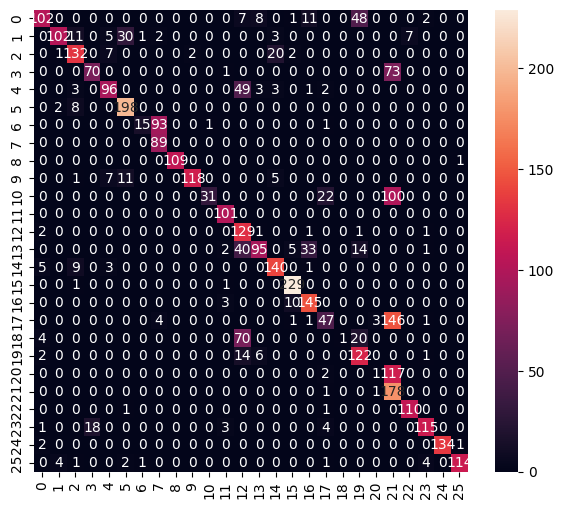

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.57      0.69       179
           1       0.94      0.63      0.76       161
           2       0.80      0.80      0.80       164
           3       0.80      0.49      0.60       144
           4       0.81      0.61      0.70       157
           5       0.82      0.95      0.88       208
           6       0.88      0.14      0.24       110
           7       0.47      1.00      0.64        89
           8       1.00      0.99      1.00       110
           9       0.98      0.83      0.90       142
          10       0.97      0.20      0.34       153
          11       0.91      1.00      0.95       101
          12       0.42      0.96      0.58       135
          13       0.84      0.50      0.63       190
          14       0.82      0.89      0.85       158
          15       0.92      0.99      0.96       231
          16       0.75      0.92      0.83       158
     

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\SHASHW~1\AppData\Local\Temp\tmp3gpg90ac\assets


INFO:tensorflow:Assets written to: C:\Users\SHASHW~1\AppData\Local\Temp\tmp3gpg90ac\assets


Saved artifact at 'C:\Users\SHASHW~1\AppData\Local\Temp\tmp3gpg90ac'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  1629101218640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1628216650896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1628216654736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1628216653584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1628223615056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1628223614096: TensorSpec(shape=(), dtype=tf.resource, name=None)


7524

# Inference test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5370941e-01 6.1698887e-04 5.0001789e-02 1.5886993e-03 8.4066866e-03
 1.0232208e-02 1.5030117e-03 1.2068979e-03 3.2967597e-03 3.9252960e-03
 1.0089414e-06 1.3615951e-01 7.1271835e-03 4.1090917e-02 3.9044280e-02
 1.1722914e-01 3.1313583e-01 5.8445090e-04 8.1895320e-03 5.6403853e-02
 8.2064653e-06 3.6665099e-06 3.4926190e-05 2.5983663e-02 1.8613506e-02
 1.9025370e-03]
16
